In [67]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(points, assignment):
    colors = assignment / assignment.max()
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=300)
    plt.axes().set_aspect('equal')

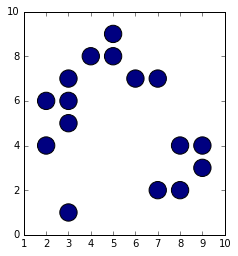

In [70]:
data = np.array([
    (2, 4), (2, 6), (3, 1), (3, 5),
    (3, 6), (3, 7), (4, 8), (5, 8),
    (5, 9), (6, 7), (7, 2), (7, 7),
    (8, 2), (8, 4), (9, 3), (9, 4),
])
plot_clusters(data, np.ones(len(data)))

In [50]:
def manhattan(one, two):
    return np.abs(one - two).sum()

def euclidean(one, two):
    return np.linalg.norm(one - two)

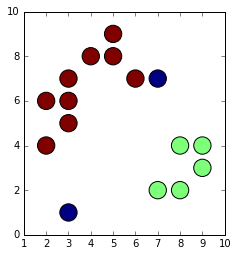

In [80]:
class DBSCAN:
    
    def __init__(self, min_points, radius, distance):
        self.min_points = min_points
        self.radius = radius
        self.distance = distance
        self.points = None
        self.unvisited = None
        self.assignment = None

    def __call__(self, points):
        """
        Return the assignment as a vector of cluster numbers for each
        point. Cluster zero contains the noise points.
        """
        self.points = [tuple(x) for x in points]
        self.unvisited = [tuple(x) for x in points]
        self.assignment = {}
        cluster = 0
        while self.unvisited:
            point = self.unvisited.pop()
            neighbors = self.neighbors(point)
            assert point in neighbors
            # Points without enough neighbors are noise points, except if
            # they're take over later; see below.
            if len(neighbors) < self.min_points:
                self.assignment[point] = 0
            # Unvisited points with enough neighbors start a new cluster.
            else:
                cluster += 1
                self.expand(neighbors, cluster)
        return np.array([self.assignment[x] for x in self.points])
        
    def expand(self, points, cluster):
        while points:
            current = points.pop()
            # Consider points that are not yet part of a cluster
            if current in self.unvisited:
                self.unvisited.remove(current)
                self.assignment[current] = cluster
                neighbors = self.neighbors(current)
                # Base points help to expand further
                if len(neighbors) >= self.min_points:
                    points += neighbors
            # Noise points are taken over by real clusters
            elif current not in self.assignment or self.assignment[current] == 0:
                self.assignment[current] = cluster
        
    def neighbors(self, center):
        neighbors = []
        for point in self.points:
            if self.distance(np.array(center), np.array(point)) < self.radius:
                neighbors.append(point)
        return neighbors
    
    
assignment = DBSCAN(min_points=4, radius=2.2, distance=euclidean)(data)
plot_clusters(data, assignment)

Source: https://github.com/danijar/notebook-big-data